In [2]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

train = pd.read_csv('./data/train_pca.csv')
train.drop(columns=['SMILES'],inplace=True)
train = train.rename(columns = {'Num_H_Acceptors': 'Acceptors','Num_H_Donors': 'Donors','Num_RotatableBonds':'RotatableBonds'})

test = pd.read_csv('./data/test_pca.csv')
test.drop(columns=['SMILES'],inplace=True)
test = test.rename(columns = {'Num_H_Acceptors': 'Acceptors','Num_H_Donors': 'Donors','Num_RotatableBonds':'RotatableBonds'})
preds = np.array([])


MLM

In [3]:
preds = np.array([])

x_df = train.drop(columns=["HLM",'MLM'])
y_df = train['MLM']
kf = KFold(n_splits=6)
i=0

for train_index, valid_index in kf.split(x_df,y_df):
    x_train, x_test =  x_df.iloc[train_index], x_df.iloc[valid_index]
    y_train, y_test =  y_df.iloc[train_index], y_df.iloc[valid_index]
    
    dtrain = xgb.DMatrix(x_train, label=y_train)
    dtest = xgb.DMatrix(x_test, label=y_test)
    
    pred_df = pd.DataFrame() 
    
    
    #최고점params={'reg_lambda': 3.970598535915323, 'gamma': 9.254009054984513, 'reg_alpha': 8.180688938901085, 'colsample_bytree': 0.7, 'subsample': 0.7, 'max_depth': 3, 'min_child_weight': 158}
    params = params = {'reg_lambda': 7.82951409523434, 'gamma': 4.9873883068002405, 'reg_alpha': 7.54907779273947, 'colsample_bytree': 1.0, 'subsample': 0.8, 'max_depth': 4, 'min_child_weight': 291}
    model = xgb.train(params,dtrain,evals=[(dtest, 'test')])
    
    
    y_pred = model.predict(dtest)
    pred_df.loc[:,i] = y_pred
    i += 1
pred = pred_df.mean(axis=1)   


[0]	test-rmse:43.19502
[1]	test-rmse:38.15463
[2]	test-rmse:35.21090
[3]	test-rmse:33.78271
[4]	test-rmse:32.80337
[5]	test-rmse:32.31020
[6]	test-rmse:32.00224
[7]	test-rmse:31.95601
[8]	test-rmse:31.91334
[9]	test-rmse:31.83608
[0]	test-rmse:40.63158
[1]	test-rmse:35.96221
[2]	test-rmse:33.46729
[3]	test-rmse:32.30715
[4]	test-rmse:31.66539
[5]	test-rmse:31.44463
[6]	test-rmse:31.35001
[7]	test-rmse:31.22314
[8]	test-rmse:31.24234
[9]	test-rmse:31.24188
[0]	test-rmse:44.48306
[1]	test-rmse:39.55414
[2]	test-rmse:36.71759
[3]	test-rmse:35.09855
[4]	test-rmse:34.09329
[5]	test-rmse:33.51256
[6]	test-rmse:33.26979
[7]	test-rmse:33.10079
[8]	test-rmse:32.98392
[9]	test-rmse:32.84298
[0]	test-rmse:42.73340
[1]	test-rmse:37.95235
[2]	test-rmse:35.45966
[3]	test-rmse:34.09926
[4]	test-rmse:33.22891
[5]	test-rmse:32.70082
[6]	test-rmse:32.39216
[7]	test-rmse:32.24686
[8]	test-rmse:32.10934
[9]	test-rmse:32.07214
[0]	test-rmse:44.93422
[1]	test-rmse:40.05055
[2]	test-rmse:36.98317
[3]	test-rm

#노튜닝
RMSE: 31.886022512928907

#튜닝ecfp
RMSE: 31.338393022479174

#튜닝Pharmacophore_fp
RMSE: 31.338393022479174

#finger_maccs_fp_train
RMSE: 31.357495438239596

#pca
RMSE: 31.70016781014502

In [4]:
#튜닝
mlm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", mlm_rmse)


RMSE: 31.70016781014502


HLM

In [5]:
preds = np.array([])

x_df = train.drop(columns=["HLM",'MLM'])
y_df = train['HLM']
kf = KFold(n_splits=6)
i = 0
for train_index, valid_index in kf.split(x_df,y_df):
    
    x_train, x_test =  x_df.iloc[train_index], x_df.iloc[valid_index]
    y_train, y_test =  y_df.iloc[train_index], y_df.iloc[valid_index]
    
    dtrain = xgb.DMatrix(x_train, label=y_train)
    dtest = xgb.DMatrix(x_test, label=y_test)
    
    pred_df = pd.DataFrame() 
    
    
    #최고점params={'reg_lambda': 7.907577397615725, 'gamma': 9.61658605798799, 'reg_alpha': 9.441643680941189, 'colsample_bytree': 1.0, 'subsample': 0.8, 'max_depth': 3, 'min_child_weight': 36}
    params = {'reg_lambda': 0.5940874042694309, 'gamma': 5.657703439375733, 'reg_alpha': 9.066908326467557, 'colsample_bytree': 0.9, 'subsample': 1.0, 'max_depth': 3, 'min_child_weight': 19} 
    model = xgb.train(params,dtrain,evals=[(dtest, 'test')])
    
    
    y_pred = model.predict(dtest)
    pred_df.loc[:,i] = y_pred
    i += 1
    
pred = pred_df.mean(axis=1)   


[0]	test-rmse:48.86887
[1]	test-rmse:40.91639
[2]	test-rmse:36.44371
[3]	test-rmse:34.09568
[4]	test-rmse:32.95935
[5]	test-rmse:32.48761
[6]	test-rmse:32.30817
[7]	test-rmse:32.21808
[8]	test-rmse:32.17969
[9]	test-rmse:32.19375
[0]	test-rmse:49.93320
[1]	test-rmse:41.92497
[2]	test-rmse:37.46077
[3]	test-rmse:35.05437
[4]	test-rmse:33.82057
[5]	test-rmse:33.28959
[6]	test-rmse:33.00606
[7]	test-rmse:32.90174
[8]	test-rmse:32.80150
[9]	test-rmse:32.74435
[0]	test-rmse:52.30248
[1]	test-rmse:44.07277
[2]	test-rmse:39.43635
[3]	test-rmse:36.74867
[4]	test-rmse:35.25706
[5]	test-rmse:34.36670
[6]	test-rmse:33.92718
[7]	test-rmse:33.68117
[8]	test-rmse:33.50920
[9]	test-rmse:33.35657
[0]	test-rmse:49.18862
[1]	test-rmse:41.38337
[2]	test-rmse:36.92287
[3]	test-rmse:34.53091
[4]	test-rmse:33.33153
[5]	test-rmse:32.63857
[6]	test-rmse:32.38239
[7]	test-rmse:32.21883
[8]	test-rmse:32.18654
[9]	test-rmse:32.14246
[0]	test-rmse:52.52359
[1]	test-rmse:44.36823
[2]	test-rmse:39.71670
[3]	test-rm

#튜닝
RMSE: 31.70542146735097

#노튜닝
RMSE: 32.14898341371406

#튜닝Pharmacophore_fp
RMSE: 32.23220378965219

#finger_maccs_fp_train
RMSE: 31.447392181040282

#pca
RMSE: 31.84551435435958

In [6]:
#튜닝
hlm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", hlm_rmse)

RMSE: 31.84551435435958


제출

In [7]:
mlm_preds = np.array([])

x_train = train.drop(columns=["HLM",'MLM'])
y_train = train['MLM']

x_test = test

for i in range(6):
    
    pred_df = pd.DataFrame() 
    #최고점params={'reg_lambda': 3.970598535915323, 'gamma': 9.254009054984513, 'reg_alpha': 8.180688938901085, 'colsample_bytree': 0.7, 'subsample': 0.7, 'max_depth': 3, 'min_child_weight': 158}
    params = params = {'reg_lambda': 7.82951409523434, 'gamma': 4.9873883068002405, 'reg_alpha': 7.54907779273947, 'colsample_bytree': 1.0, 'subsample': 0.8, 'max_depth': 4, 'min_child_weight': 291}
    mlm_model = xgb.XGBRegressor(**params,seed=i,tree_method= "hist", gpu_id=0,)
    mlm_model.fit(x_train,y_train)
    
    y_pred = mlm_model.predict(test)
    
    pred_df.loc[:,i] = y_pred
    i += 1
pred = pred_df.mean(axis=1)   
mlm_preds = np.append(preds, pred)


hlm_preds = np.array([])
x_train = train.drop(columns=["HLM",'MLM'])
y_train = train['HLM']

x_test = test

for i in range(6):
    
    pred_df = pd.DataFrame() 
    #최고점params={'reg_lambda': 7.907577397615725, 'gamma': 9.61658605798799, 'reg_alpha': 9.441643680941189, 'colsample_bytree': 1.0, 'subsample': 0.8, 'max_depth': 3, 'min_child_weight': 36}
    params = {'reg_lambda': 0.5940874042694309, 'gamma': 5.657703439375733, 'reg_alpha': 9.066908326467557, 'colsample_bytree': 0.9, 'subsample': 1.0, 'max_depth': 3, 'min_child_weight': 19} 
    hlm_model = xgb.XGBRegressor(**params,seed=i,tree_method= "hist", gpu_id=0)
    hlm_model.fit(x_train,y_train)
    
    y_pred = hlm_model.predict(test)
    
    pred_df.loc[:,i] = y_pred
    i += 1
pred = pred_df.mean(axis=1)   
hlm_preds = np.append(preds, pred)



In [8]:
def get_model_complexity(model):
    trees = model.get_booster().get_dump()
    depths = [tree.count('\n') for tree in trees]  # 각 트리의 깊이 계산
    avg_depth = sum(depths) / len(depths)
    return avg_depth


11.76
13.34


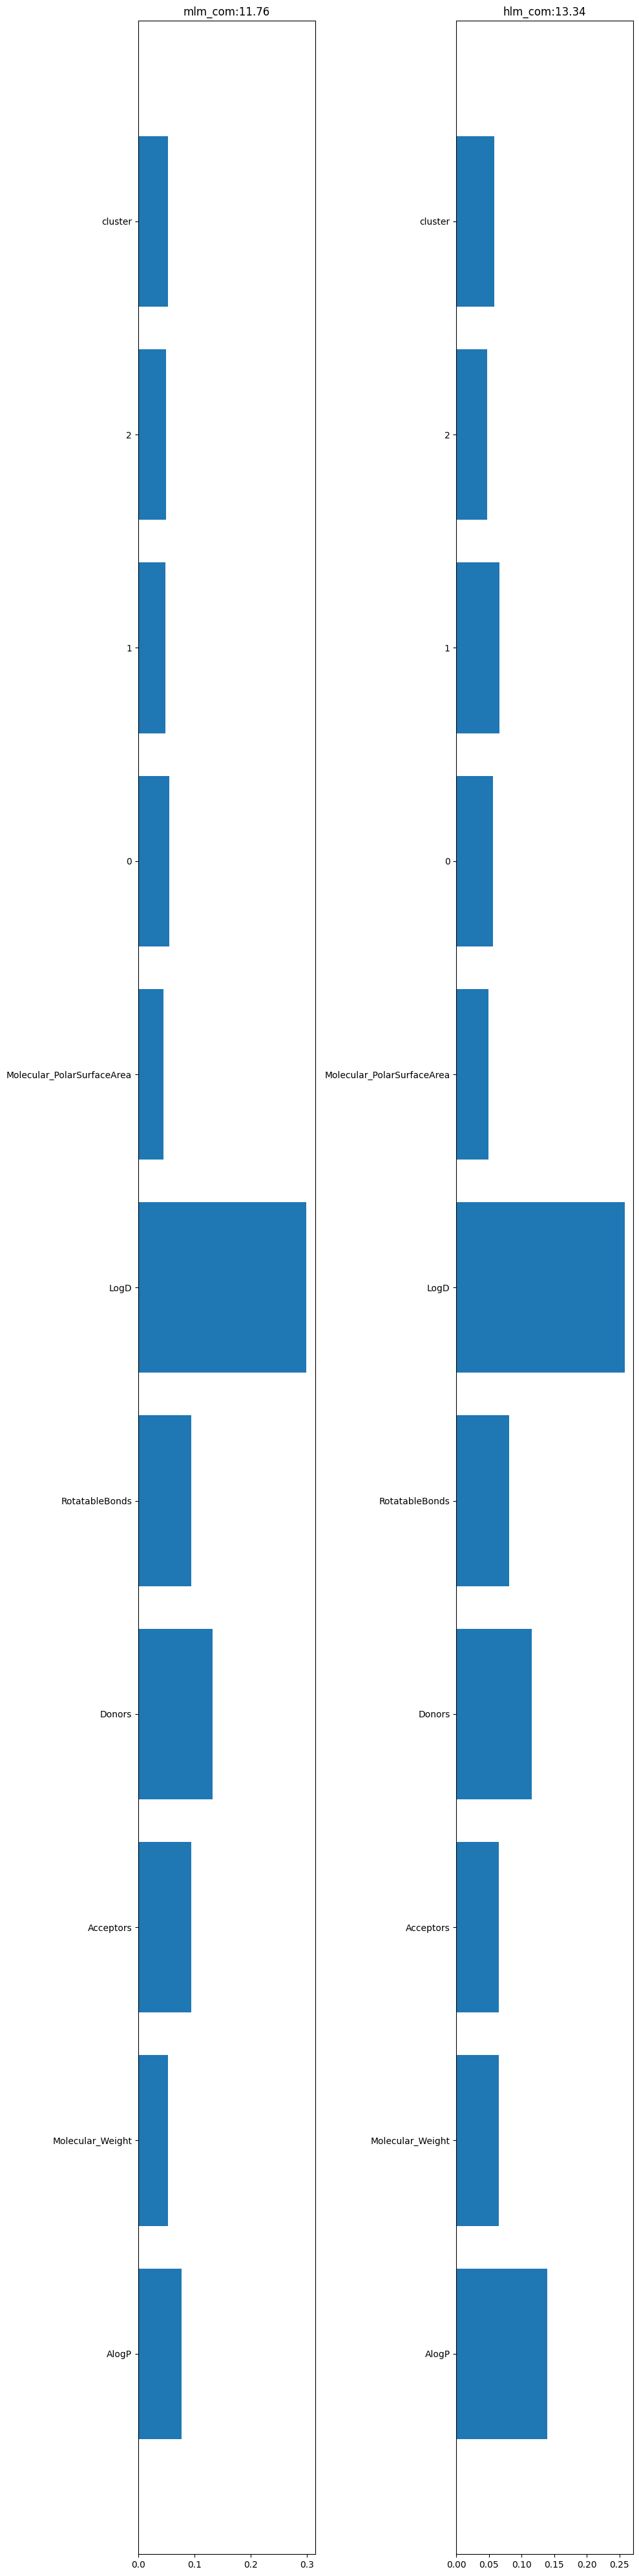

In [9]:
#튜닝
mlm_complexity = get_model_complexity(mlm_model)
print(mlm_complexity)
hlm_complexity = get_model_complexity(hlm_model)
print(hlm_complexity)

fig = plt.figure(figsize = (10, 40))
ax = plt.subplot(1, 2, 1)
plt.title(f"mlm_com:{mlm_complexity}")
plt.barh(x_test.columns,mlm_model.feature_importances_)
ax = plt.subplot(1, 2, 2)
plt.title(f"hlm_com:{hlm_complexity}")
plt.barh(x_test.columns,hlm_model.feature_importances_)
plt.tight_layout()
plt.show()

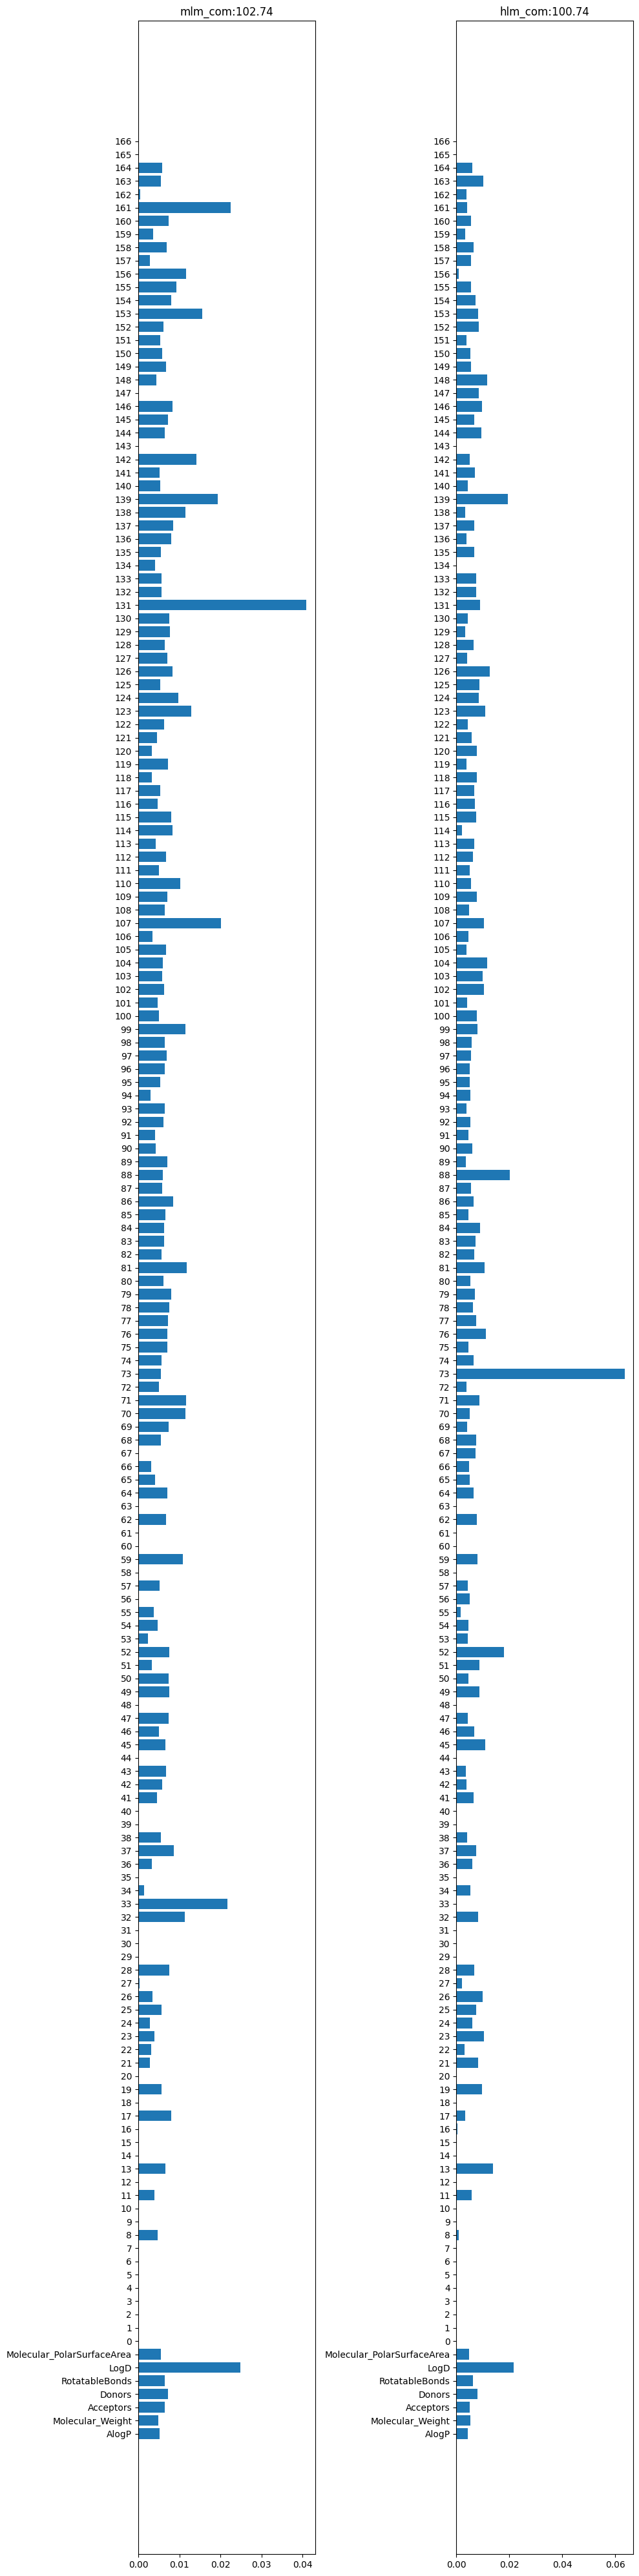

In [6]:
# #노튜닝
# mlm_complexity = get_model_complexity(mlm_model)
# hlm_complexity = get_model_complexity(hlm_model)

# fig = plt.figure(figsize = (10, 40))
# ax = plt.subplot(1, 2, 1)
# plt.title(f"mlm_com:{mlm_complexity}")
# plt.barh(x_test.columns,mlm_model.feature_importances_)
# ax = plt.subplot(1, 2, 2)
# plt.title(f"hlm_com:{hlm_complexity}")
# plt.barh(x_test.columns,hlm_model.feature_importances_)
# plt.tight_layout()
# plt.show()

In [7]:
submission = pd.read_csv('./origin_data/sample_submission.csv')
submission['MLM'] = mlm_preds
submission['HLM'] = hlm_preds
submission.to_csv('./submission/xgb_finger_pca.csv',index=False)